# Projeto de IA - Classificação de Alunos (Aprovado x Reprovado)


In [ ]:
# ============================================================
# PROJETO DE IA - CLASSIFICAÇÃO SIMPLES (APROVADO x REPROVADO)
# ============================================================

# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Gerando um dataset fictício de 200 alunos
np.random.seed(42)  # garante reprodutibilidade

dados = pd.DataFrame({
    "nota_prova1": np.random.randint(0, 101, 200),
    "nota_prova2": np.random.randint(0, 101, 200),
    "frequencia": np.random.randint(50, 101, 200),   # entre 50% e 100%
    "trabalhos": np.random.randint(0, 11, 200)       # número de trabalhos entregues
})

# Criando a coluna "aprovado" com uma regra simples:
# aprovado se média das provas >= 60 e frequência >= 75
dados["aprovado"] = (((dados["nota_prova1"] + dados["nota_prova2"]) / 2 >= 60) &
                     (dados["frequencia"] >= 75)).astype(int)

# Visualizando os 5 primeiros registros
dados.head()


,nota_prova1,nota_prova2,frequencia,trabalhos,aprovado
0,51,69,73,0,0
1,92,71,99,2,1
2,14,26,81,3,0
3,71,8,96,1,0
4,60,61,71,0,0


In [ ]:
# X = variáveis independentes (entrada)
X = dados[["nota_prova1", "nota_prova2", "frequencia", "trabalhos"]]

# y = variável alvo (saída: aprovado ou não)
y = dados["aprovado"]

# Divisão treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o modelo de Regressão Logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Calculando acurácia
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))


Acurácia do modelo: 0.95


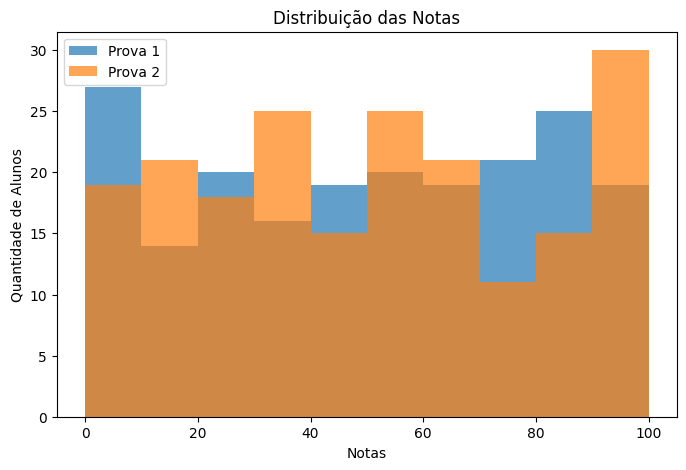

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(dados["nota_prova1"], bins=10, alpha=0.7, label="Prova 1")
plt.hist(dados["nota_prova2"], bins=10, alpha=0.7, label="Prova 2")
plt.title("Distribuição das Notas")
plt.xlabel("Notas")
plt.ylabel("Quantidade de Alunos")
plt.legend()
plt.show()


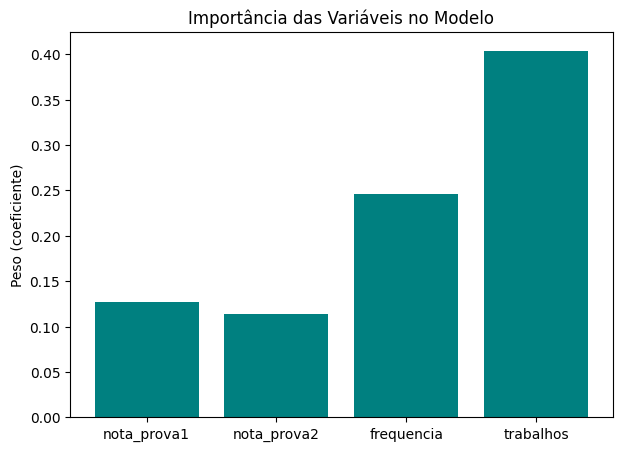

In [ ]:
coeficientes = modelo.coef_[0]
variaveis = X.columns

plt.figure(figsize=(7,5))
plt.bar(variaveis, coeficientes, color="teal")
plt.title("Importância das Variáveis no Modelo")
plt.ylabel("Peso (coeficiente)")
plt.show()


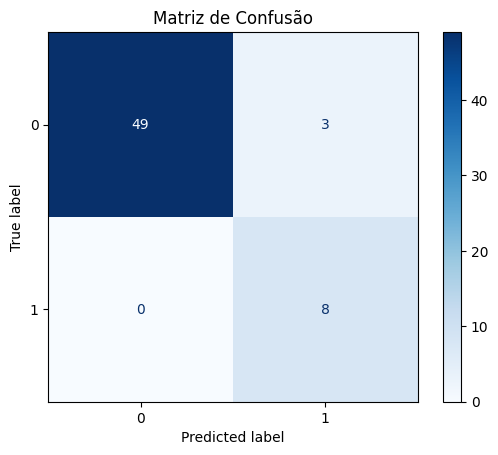

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()
